# Handwrittent Digits Recognition Using CNN

### load our dataset and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

In [2]:
np.random.seed(2)
sns.set(style='white', context='notebook', palette='deep')

In [20]:
# Load the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

### Data Exploration

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Checking the number of samples, dimenions and whether images are color or grayscale

In [6]:
print("Initial shape of our training data", str(train.shape))
print("Initial shape of our testing data", str(test.shape))
print ("-"*60)
print ("Training samples: " + str(len(train)) + " ###### Training labels: " + str(len(train)))
print ("-"*60)
print ("Testing samples: " + str(len(test)) + " ###### Testing labels: " + str(len(test)))

Initial shape of our training data (42000, 785)
Initial shape of our testing data (28000, 784)
------------------------------------------------------------
Training samples: 42000 ###### Training labels: 42000
------------------------------------------------------------
Testing samples: 28000 ###### Testing labels: 28000


In [21]:
# we split our train data to x_train (image) and y_train (label)
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1) 
del train 

In [8]:
print ("Dimensions of X_train:" + str(X_train.shape))
print ("Labels of our train:" + str(Y_train.shape))
print ("-"*60)
print ("Dimensions of X_train:" + str(X_train.values.reshape(-1,28,28).shape))

Dimensions of X_train:(42000, 784)
Labels of our train:(42000,)
------------------------------------------------------------
Dimensions of X_train:(42000, 28, 28)


- Our data consist of **42,000** samples of training data and **28,000** samples of test data
- Our Image dimenions are **28 x 28**, they are grayscale (no BGR channels)

In [17]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

from bokeh.models import ColumnDataSource, HoverTool

output_notebook()

counts = Y_train.value_counts().sort_index()
counts = ColumnDataSource(pd.DataFrame({'digits':counts.index, 'frequence':counts.values}))

hover = HoverTool(
        tooltips=[
            ("digits", "@digits"),
            ("frequence", "@frequence")
        ]
    )

# Create a figure with a datetime type x-axis
fig = figure(title='Training Data Frequency Graph',
             plot_height=400, plot_width=700, tools=[hover],
             x_axis_label='Digits', y_axis_label='Frequency',
             y_range=(0, 5000), x_range=(-0.5,9.5))


# The daily words will be represented as vertical bars (columns)
fig.vbar(x='digits', bottom=0, top='frequence', source = counts,
         color='blue', width=0.75)

show(fig)

Loading BokehJS ...

### Data Preparation

In [22]:
# Normalize the data by changing the range from (0 to 255) to (0 to 1)
X_train = X_train / 255.0
test = test / 255.0

# Getting our date in the right dimension needed for Keras
# We need to add a 4th dimension to our date thus, changing 
# Our original image shape from (42000, 784) to (42000,28,28,1)

X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

print("Train data shape: " + str(X_train.shape))
print("-"*40)
print("Test data shape: " + str(test.shape))

Train data shape: (42000, 28, 28, 1)
----------------------------------------
Test data shape: (28000, 28, 28, 1)


### train data visualisation 

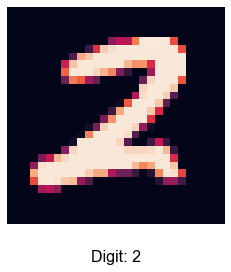

In [29]:
image = np.random.randint(0,42000)
plt.imshow(X_train[image].reshape([28,28])) 
plt.title('Digit: '+str(Y_train[image]), y=-0.2,color="black", fontsize=16)
plt.axis('off')
plt.show()

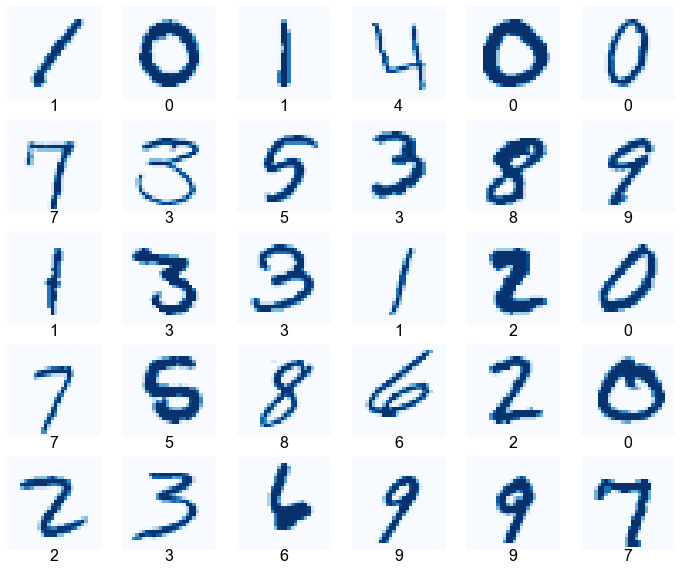

In [30]:
rows = 5 
cols = 6 

fig = plt.figure(figsize=(2*cols,2*rows))

for i in range(rows*cols): 
    fig.add_subplot(rows,cols,i+1) 
    plt.imshow(X_train[i].reshape([28,28]),cmap="Blues") 
    plt.axis("off")
    plt.title(str(Y_train[i]), y=-0.17,color="black", fontsize=16)
plt.show()

### One Hot Encode Our Labels 

In [34]:
print("Initial label example: " + str(Y_train[0]))

from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)

print("-"*30)
print("Our one hot encoder label example: " + str(Y_train[0]))

Initial label example: 1
------------------------------
Our one hot encoder label example[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


### Model Creation

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [36]:
# Splitting our train data into train set and validation set
random_seed = 2
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

In [38]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

Keras provides several optimizers that can be used by importing the optimizers and passing in compile function.

- Gradient descent
- Mini-batch gradient descent
- SGD (Stochastic gradient descent optimizer)
- RMSprop
- Adam
- Adamax

In [ ]:
# binary_crossentropy: Binary classification task
# categorical_crossentropy: Multi-class classification (our targets are one-hot encoded)
# sparse_categorical_crossentropy: Multi-class classification (if our targets are integers)

In [39]:
from keras import optimizers
optimizer = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [40]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [42]:
from keras.callbacks import ModelCheckpoint

In [43]:
epochs = 20        ### Single pass through the entire data
batch_size = 256   ### split each epoch data into mini batches to speed up the training process  

In [46]:
epochs = 20 
batch_size = 256

## Save every epoch weights 
checkpoint = ModelCheckpoint("models", monitor='accuracy', verbose=1,
    save_best_only=False, save_weights_only=False, mode='auto', save_freq=1)
filepath="models\weights-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=False, mode='max')

history = model.fit(Xtrain,
                    Ytrain,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (Xtest, Ytest),
                    callbacks=[checkpoint])

Epoch 1/20
148/148 [==============================] - ETA: 0s - loss: 0.6020 - accuracy: 0.7993
Epoch 00001: saving model to models\weights-01-0.97.hdf5
148/148 [==============================] - 80s 542ms/step - loss: 0.6020 - accuracy: 0.7993 - val_loss: 0.1013 - val_accuracy: 0.9655
Epoch 2/20
148/148 [==============================] - ETA: 0s - loss: 0.1370 - accuracy: 0.9622
Epoch 00002: saving model to models\weights-02-0.98.hdf5
148/148 [==============================] - 80s 540ms/step - loss: 0.1370 - accuracy: 0.9622 - val_loss: 0.0642 - val_accuracy: 0.9810
Epoch 3/20
148/148 [==============================] - ETA: 0s - loss: 0.0972 - accuracy: 0.9735
Epoch 00003: saving model to models\weights-03-0.98.hdf5
148/148 [==============================] - 78s 527ms/step - loss: 0.0972 - accuracy: 0.9735 - val_loss: 0.0536 - val_accuracy: 0.9833
Epoch 4/20
148/148 [==============================] - ETA: 0s - loss: 0.0777 - accuracy: 0.9785
Epoch 00004: saving model to models\weights

In [47]:
score = model.evaluate(Xtest, Ytest, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03608287498354912
Test accuracy: 0.9933333396911621


In [63]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

from bokeh.models.widgets import Tabs, Panel
from bokeh.models import HoverTool

output_notebook()

# Create and configure the figure
acc_fig = figure(plot_height=300, x_axis_label='#Iteration', toolbar_location=None, x_range=(0,21))

loss_fig = figure(plot_height=300, x_axis_label='#Iteration', toolbar_location=None, x_range=(0,21))

acc_fig.line(np.arange(1,21), history.history['accuracy'], color='#007A33', legend_label='Training accuracy')
acc_fig.line(np.arange(1,21), history.history['val_accuracy'], color='#CE1141', legend_label='Validation accuracy')

loss_fig.line(np.arange(1,21), history.history['loss'], color='#007A33', legend_label='Training loss')
loss_fig.line(np.arange(1,21), history.history['val_loss'], color='#CE1141', legend_label='validation loss')

# Increase the plot widths
acc_fig.plot_width = loss_fig.plot_width = 800

# Create two panels, one for each conference
acc_panel = Panel(child=acc_fig, title='Accuracy plot')
loss_panel = Panel(child=loss_fig, title='Loss plot')

# Assign the panels to Tabs
tabs = Tabs(tabs=[acc_panel, loss_panel])

# Show the tabbed layout
show(tabs)

Loading BokehJS ...

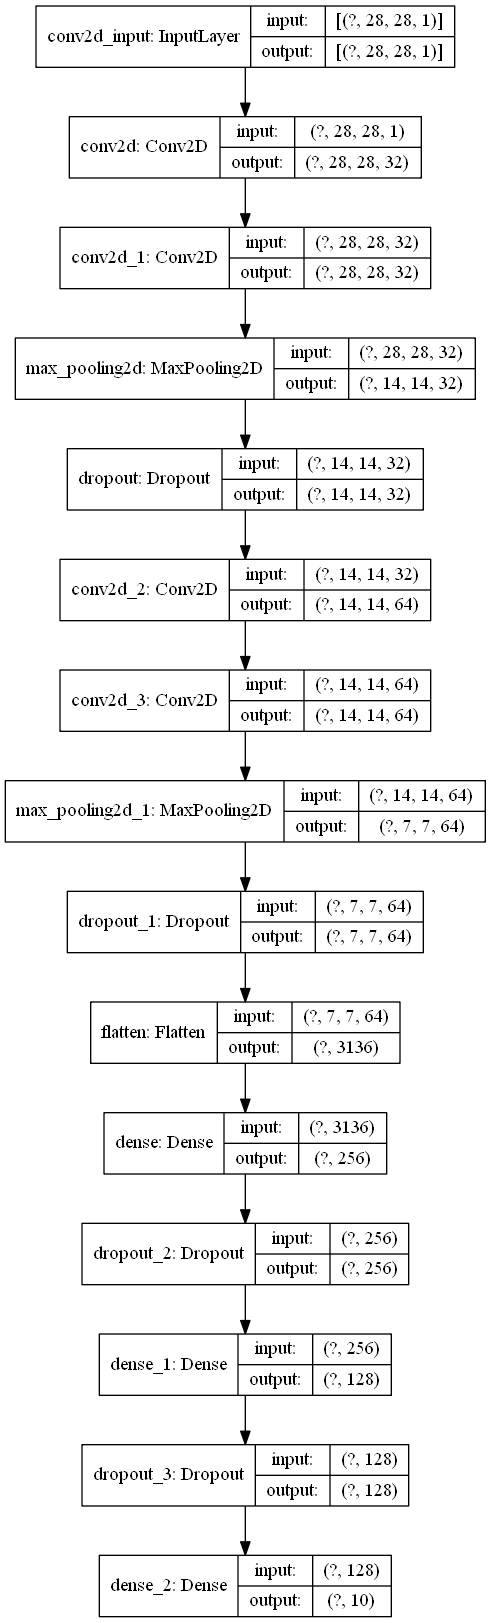

In [49]:
## plot and save our model architecture 
from keras.utils.vis_utils import plot_model

plot_model(model, to_file = 'model_plot.png',
           show_shapes = True,
           show_layer_names = True)

### Testing examples 

In [105]:
import cv2
import numpy as np

for i in range(0,10):
    rand = np.random.randint(0,len(test))
    input_image = test[rand]

    resized = cv2.resize(input_image, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    input_image = input_image.reshape(1,28,28,1) 
    
    ## Prediction
    prediction = str(np.argmax(model.predict(input_image)))
    
    expanded_image = cv2.copyMakeBorder(resized, 0, 0, 0, resized.shape[0] ,cv2.BORDER_CONSTANT,value=[0,0,0])
    cv2.putText(expanded_image, str(prediction), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (255,255,255), 2)
    
    cv2.imshow("image", expanded_image) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

### Confusion matrix

In [106]:
# Validation dataset forecast
Ypred = np.argmax(model.predict(Xtest), axis=1)
# Validation dataset true Values
Ytrue = np.argmax(Ytest,axis = 1) 
# Confusion matrix
ConfusionMatrix = confusion_matrix(Ytrue, Ypred) 
ConfusionMatrix

array([[411,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 483,   0,   0,   0,   0,   0,   0,   1,   1],
       [  0,   0, 402,   0,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0, 413,   0,   2,   0,   0,   3,   0],
       [  0,   1,   0,   0, 453,   0,   1,   0,   1,   5],
       [  0,   0,   0,   0,   0, 369,   1,   0,   2,   0],
       [  2,   1,   0,   0,   0,   0, 409,   0,   1,   0],
       [  0,   0,   1,   0,   0,   0,   0, 445,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 381,   1],
       [  1,   0,   0,   0,   1,   0,   0,   1,   0, 406]], dtype=int64)

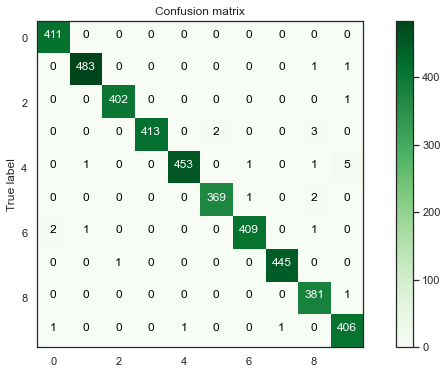

In [107]:
fig = plt.figure(figsize=(12,6))
plt.imshow(ConfusionMatrix, cmap =plt.cm.Greens)
plt.title('Confusion matrix')
plt.ylabel('True label')

plt.colorbar()
#tick_marks = np.arange(10)


thresh = ConfusionMatrix.max() / 2.
for i, j in itertools.product(range(ConfusionMatrix.shape[0]), range(ConfusionMatrix.shape[1])):
    plt.text(j, i, ConfusionMatrix[i, j],
             horizontalalignment="center",
             color="white" if ConfusionMatrix[i, j] > thresh else "black")
plt.show()

### Submission 

In [108]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [109]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("submission.csv",index=False)

### Data Augmentation 

In [110]:
datagen = ImageDataGenerator(rotation_range=10, zoom_range = 0.1, width_shift_range=0.1, height_shift_range=0.1)
datagen.fit(Xtrain)

In [111]:
# Reduce learning rate when a metric has stopped improving.
lrr = ReduceLROnPlateau(monitor='val_accuracy',patience=2,verbose=1,factor=0.5, min_lr=0.00001)

In [112]:
## Save every epoch weights 
checkpoint = ModelCheckpoint("models", monitor='accuracy', verbose=1,
    save_best_only=False, save_weights_only=False, mode='auto', save_freq=1)
filepath="models_aug\weights-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=False, mode='max')
# Fit the model
history1 = model.fit_generator(datagen.flow(Xtrain,Ytrain, batch_size=batch_size),
                              epochs = epochs, validation_data = (Xtest,Ytest),
                              verbose = 2,  callbacks=[checkpoint], steps_per_epoch=Xtrain.shape[0] // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20

Epoch 00001: saving model to models_aug\weights-01-0.99.hdf5
147/147 - 76s - loss: 0.1358 - accuracy: 0.9645 - val_loss: 0.0279 - val_accuracy: 0.9936
Epoch 2/20

Epoch 00002: saving model to models_aug\weights-02-0.99.hdf5
147/147 - 78s - loss: 0.0822 - accuracy: 0.9783 - val_loss: 0.0317 - val_accuracy: 0.9936
Epoch 3/20

Epoch 00003: saving model to models_aug\weights-03-0.99.hdf5
147/147 - 79s - loss: 0.0705 - accuracy: 0.9808 - val_loss: 0.0257 - val_accuracy: 0.9936
Epoch 4/20

Epoch 00004: saving model to models_aug\weights-04-0.99.hdf5
147/147 - 79s - loss: 0.0645 - accuracy: 0.9824 - val_loss: 0.0254 - val_accuracy: 0.9945
Epoch 5/20

Epoch 00005: saving model to models_aug\weights-05-1.00.hdf5
147/147 - 79s - loss: 0.0585 - accuracy: 0.9838 - val_loss: 0.0212 - val_accuracy: 0.9955
Epoch 6/20

Epoch 00006: saving model to models_aug\weights-06-0.99.hdf5
147/147 - 80s - loss: 0.0561 - accur

In [113]:
score = model.evaluate(Xtest, Ytest, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.018088335171341896
Test accuracy: 0.9942857027053833


In [114]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

from bokeh.models.widgets import Tabs, Panel
from bokeh.models import HoverTool

output_notebook()

# Create and configure the figure
acc_fig = figure(plot_height=300, x_axis_label='#Iteration', toolbar_location=None, x_range=(0,21))

loss_fig = figure(plot_height=300, x_axis_label='#Iteration', toolbar_location=None, x_range=(0,21))

acc_fig.line(np.arange(1,21), history1.history['accuracy'], color='#007A33', legend_label='Training accuracy')
acc_fig.line(np.arange(1,21), history1.history['val_accuracy'], color='#CE1141', legend_label='Validation accuracy')

loss_fig.line(np.arange(1,21), history1.history['loss'], color='#007A33', legend_label='Training loss')
loss_fig.line(np.arange(1,21), history1.history['val_loss'], color='#CE1141', legend_label='validation loss')

# Increase the plot widths
acc_fig.plot_width = loss_fig.plot_width = 800

# Create two panels, one for each conference
acc_panel = Panel(child=acc_fig, title='Accuracy plot')
loss_panel = Panel(child=loss_fig, title='Loss plot')

# Assign the panels to Tabs
tabs = Tabs(tabs=[acc_panel, loss_panel])

# Show the tabbed layout
show(tabs)

Loading BokehJS ...

To obtain a 100% accuracy in the kaggle competition, we can use the whole MNIST data set  

In [117]:
from keras.datasets import mnist

# loads the MNIST dataset
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

print ("Train shape: " +str(x_train.shape))
print("-"*30)
print ("Test shape: "+ str(x_test.shape))

Train shape: (60000, 28, 28)
------------------------------
Test shape: (10000, 28, 28)
